## Using different types of Clustering

In [10]:
#libraries 
from pathlib import Path
import pandas as pd 
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.metrics import davies_bouldin_score
import re
import hdbscan
import umap

In [11]:
##results from minhashing
path = Path(r"C:\Users\marta\My drive (marta.infante.baiao@gmail.com) (1)\DTU\Computational Tools\minhashing_results_subset.csv")
df = pd.read_csv(path)
df.shape
df.columns

Index(['signature', 'rating'], dtype='str')

In [12]:
#Prepare data for clustering:
#Convert integer to float
df['signature'] = df['signature'].apply(
    lambda s: np.array(re.findall(r'-?\d+', str(s)), dtype=int)
)

#Transform  df['signature'] in lists of length 100 
X = np.array(df['signature'].tolist())
y = df['rating'].values  # true labels

In [6]:
#check X and y shape 
print(X.shape)
print(y.shape)

(500000, 100)
(500000,)


## UMAP

In [ ]:
umap_model = umap.UMAP(
    n_neighbors=30,      # controls local vs global structure
    min_dist=0.0,        # tighter clusters
    n_components=15,      
    metric='euclidean',
    random_state=42
)

X_umap = umap_model.fit_transform(X)

c:\Users\marta\miniforge3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


## K-means

In [7]:
#RUN K-MEANS
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
Kmeans_clusters = kmeans.fit_predict(X)
clusters=Kmeans_clusters+1  # shift to make clusters start at 1

#check clustering results 
Kmeans_clusters.shape
print(Kmeans_clusters[70:75])
print(np.unique(Kmeans_clusters))

[0 1 3 0 3]
[0 1 2 3 4]


In [8]:
#EVALUATION using DAVIES-BOULDIN INDEX
def DB(X, clusters):
    db = davies_bouldin_score(X, clusters)
    return db

#Evaluate K-Means
db_Kmeans = DB(X, Kmeans_clusters)
print(f"Davies-Bouldin Index (DB): {db_Kmeans:.4f}")

Davies-Bouldin Index (DB): 2.9797


In [ ]:
# Reduce to 2D using UMAP
plt.figure(figsize=(8,6))
scatter = plt.scatter(X2_umap[:, 0], X2_umap[:, 1],
                      c=clusters, cmap='tab10', alpha=0.7)

# Legend for cluster IDs
handles, labels = scatter.legend_elements()
plt.legend(handles, [f"Cluster {i}" for i in np.unique(clusters)], 
           title="Clusters")

plt.title("Clustering Visualization (UMAP 2D)")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.show()

rating     1.0    2.0    3.0    4.0     5.0
cluster                                    
1        10520   6998  10571  24746   92228
2         4213   2571   4742  12452   48985
3         1613    884   1700   4419   18570
4        16979  14741  25127  55722  140495
5          213     40     94    200    1177


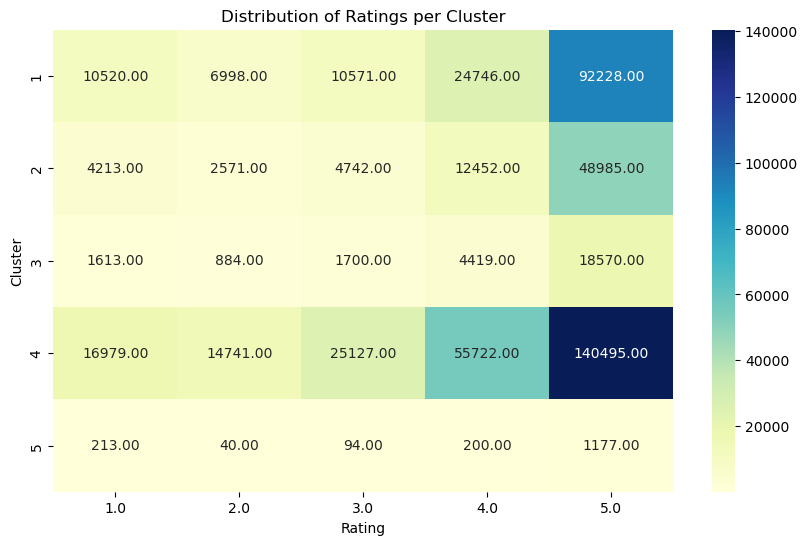

rating        1.0       2.0       3.0       4.0       5.0
cluster                                                  
1        0.313674  0.277324  0.250296  0.253704  0.305943
2        0.125619  0.101886  0.112279  0.127662  0.162495
3        0.048095  0.035032  0.040252  0.045305  0.061601
4        0.506262  0.584172  0.594947  0.571279  0.466056
5        0.006351  0.001585  0.002226  0.002050  0.003904


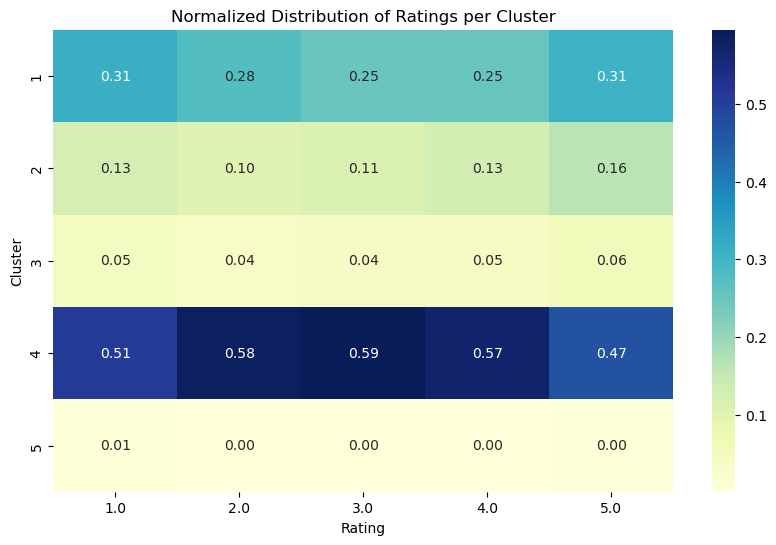

In [ ]:
# Create dataframe containing ratings and cluster assignments
df_kmeans = pd.DataFrame({
    'rating': y,
    'cluster': clusters
})

#Table showing distribution of ratings per cluster
cluster_summary = pd.crosstab(df_kmeans['cluster'], df_kmeans['rating'])
print(cluster_summary)

#print heatmap 
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(cluster_summary, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Distribution of Ratings per Cluster")
plt.xlabel("Rating")
plt.ylabel("Cluster")
plt.show()

#Normalize the values to take into account the size of each group of rating 
for i in range(1,6):
    cluster_summary[i] = cluster_summary[i] / cluster_summary[i].sum()
print(cluster_summary)

#print heatmap 
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(cluster_summary, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Normalized Distribution of Ratings per Cluster")
plt.xlabel("Rating")
plt.ylabel("Cluster")
plt.show()

## HDBSCAN

In [ ]:
HDBSCAN = hdbscan.HDBSCAN(
    min_cluster_size=500,
    min_samples=minNpoints
)
Hdbscan_clusters = HDBSCAN.fit_predict(X_umap)

In [ ]:
#check clustering results 
Hdbscan_clusters.shape
print(Hdbscan_clusters[70:75])
print(np.unique(Hdbscan_clusters))

In [ ]:
#clusters=Dbscan_clusters+1  # shift to make clusters start at 1
clusters=Hdbscan_clusters+1 

In [ ]:
#EVALUATION using DAVIES-BOULDIN INDEX
def DB(X, clusters):
    db = davies_bouldin_score(X, clusters)
    return db

#Evaluate HDBSCAN
db_Hdbscan = DB(X_umap, Hdbscan_clusters)
print(f"Davies-Bouldin Index (DB) for DBSCAN: {db_Hdbscan:.4f}")

In [ ]:
# Reduce to 2D using UMAP
plt.figure(figsize=(8,6))
scatter = plt.scatter(X2_umap[:, 0], X2_umap[:, 1],
                      c=Hdbscan_clusters, cmap='tab10', alpha=0.7)

# Legend for cluster IDs
handles, labels = scatter.legend_elements()
plt.legend(handles, [f"Cluster {i}" for i in np.unique(Hdbscan_clusters)], 
           title="Clusters")

plt.title("Clustering Visualization (UMAP 2D)")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.show()

In [ ]:
# Create dataframe containing ratings and cluster assignments
df_Hdbscan = pd.DataFrame({
    'rating': y,
    'cluster': Hdbscan_clusters
})

#Table showing distribution of ratings per cluster
cluster_summary = pd.crosstab(df_Hdbscan['cluster'], df_Hdbscan['rating'])
print(cluster_summary)

#print heatmap 
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(cluster_summary, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Distribution of Ratings per Cluster")
plt.xlabel("Rating")
plt.ylabel("Cluster")
plt.show()

#Normalize the values to take into account the size of each group of rating 
for i in range(1,6):
    cluster_summary[i] = cluster_summary[i] / cluster_summary[i].sum()
print(cluster_summary)

#print heatmap 
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(cluster_summary, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Normalized Distribution of Ratings per Cluster")
plt.xlabel("Rating")
plt.ylabel("Cluster")
plt.show()